In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import cos, radians
import time

In [2]:
def plot_TMA_EIDW():
    
    TMA_lon=[-5.5000, -5.5000, -5.5000, -5.5000, -5.5000, -6.6169, -6.8333, -7.3333, -7.3333, -6.7606, -5.5000];

    TMA_lat=[53.9167, 53.7672, 53.0975, 52.7594, 52.3333, 52.6139, 52.7594, 53.0908, 53.7522, 54.1619, 53.9167];
    
    # Runway 10R
    rwy10R_lon=[-6.290075, -6.250578];
    rwy10R_lat=[53.42243, 53.42026];

    # Runway 28L
    rwy28L_lon=[-6.250578, -6.290075];
    rwy28L_lat=[53.42026, 53.42243];

    # Runway 16
    rwy16_lon=[-6.261978, -6.249594];
    rwy16_lat=[53.43699, 53.41991];

    # Runway 34
    rwy34_lon=[6.249594, -6.261978];
    rwy34_lat=[53.41991, 53.43699];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy10R_lon, rwy10R_lat, color="red")
    plt.plot(rwy16_lon, rwy16_lat, color="red")
    
    # Entry Points
    ABLIN_lon = -4.9925
    ABLIN_lat =	52.7828
    BAGSO_lon = -5.5000
    BAGSO_lat =	53.6800
    BAMLI_lon = -6.6511
    BAMLI_lat =	54.1412
    BOYNE_lon = -5.5000
    BOYNE_lat =	53.7671
    BUNED_lon = -6.6301
    BUNED_lat =	52.6228
    LIPGO_lon = -5.5000
    LIPGO_lat =	53.0639
    NIMAT_lon = -5.7421
    NIMAT_lat =	53.9650
    OLAPO_lon = -7.2946
    OLAPO_lat =	53.7803
    OSGAR_lon = -7.2702
    OSGAR_lat =	53.0494
    SUTEX_lon = -6.9304
    SUTEX_lat =	52.8244
    VATRY_lon = -5.5000
    VATRY_lat =	52.5544

    plt.plot(ABLIN_lon, ABLIN_lat, 'ro')
    plt.plot(BAGSO_lon, BAGSO_lat, 'ro')
    plt.plot(BAMLI_lon, BAMLI_lat, 'ro')
    plt.plot(BOYNE_lon, BOYNE_lat, 'ro')
    plt.plot(BUNED_lon, BUNED_lat, 'ro')
    plt.plot(LIPGO_lon, LIPGO_lat, 'ro')
    plt.plot(NIMAT_lon, NIMAT_lat, 'ro')
    plt.plot(OLAPO_lon, OLAPO_lat, 'ro')
    plt.plot(OSGAR_lon, OSGAR_lat, 'ro')
    plt.plot(SUTEX_lon, SUTEX_lat, 'ro')
    plt.plot(VATRY_lon, VATRY_lat, 'ro')
    
    rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
    rwy28L_around_lat=[53.37, 53.47, 53.47, 53.37, 53.37];
    
    plt.plot(rwy28L_around_lon, rwy28L_around_lat)

In [3]:
def plot_horizontal_profile_EIDW(df, runway, linewidth):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = 53.25
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_EIDW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            if row['lon'].item() != 0:
                lon.append(row['lon'].item())
            if row['lat'].item() != 0:
                lat.append(row['lat'].item())
            
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        plt.plot(lon, lat, color='k', linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)

In [ ]:
filename = "../data/EIDW/2019/osn_EIDW_states_TMA_2019/osn_EIDW_states_TMA_2019_10_week1_by_runways/osn_EIDW_states_TMA_2019_10_week1_rwy28.csv"
week1_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/osn_EIDW_states_TMA_2019/osn_EIDW_states_TMA_2019_10_week2_by_runways/osn_EIDW_states_TMA_2019_10_week2_rwy28.csv"
week2_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/osn_EIDW_states_TMA_2019/osn_EIDW_states_TMA_2019_10_week3_by_runways/osn_EIDW_states_TMA_2019_10_week3_rwy28.csv"
week3_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/osn_EIDW_states_TMA_2019/osn_EIDW_states_TMA_2019_10_week4_by_runways/osn_EIDW_states_TMA_2019_10_week4_rwy28.csv"
week4_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

In [ ]:
filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week1_rwy28.csv"
vertical_PIs_by_hour_week1_rwy28_df = pd.read_csv(filename, sep=' ')

filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week2_rwy28.csv"
vertical_PIs_by_hour_week2_rwy28_df = pd.read_csv(filename, sep=' ')

filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week3_rwy28.csv"
vertical_PIs_by_hour_week3_rwy28_df = pd.read_csv(filename, sep=' ')

filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week4_rwy28.csv"
vertical_PIs_by_hour_week4_rwy28_df = pd.read_csv(filename, sep=' ')

In [ ]:
filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week1_rwy28.csv"
vertical_PIs_by_flight_week1_rwy28_df = pd.read_csv(filename, sep=' ')

filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week2_rwy28.csv"
vertical_PIs_by_flight_week2_rwy28_df = pd.read_csv(filename, sep=' ')

filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week3_rwy28.csv"
vertical_PIs_by_flight_week3_rwy28_df = pd.read_csv(filename, sep=' ')

filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week4_rwy28.csv"
vertical_PIs_by_flight_week4_rwy28_df = pd.read_csv(filename, sep=' ')

In [ ]:
week = 4

In [ ]:
if week == 1:
    PIs_by_hour_df = vertical_PIs_by_hour_week1_rwy28_df
    PIs_by_flight_df = vertical_PIs_by_flight_week1_rwy28_df
    states_df = week1_rwy28_df
elif week == 2:
    PIs_by_hour_df = vertical_PIs_by_hour_week2_rwy28_df
    PIs_by_flight_df = vertical_PIs_by_flight_week2_rwy28_df
    states_df = week2_rwy28_df
elif week == 3:
    PIs_by_hour_df = vertical_PIs_by_hour_week3_rwy28_df
    PIs_by_flight_df = vertical_PIs_by_flight_week3_rwy28_df
    states_df = week3_rwy28_df
elif week ==4:
    PIs_by_hour_df = vertical_PIs_by_hour_week4_rwy28_df
    PIs_by_flight_df = vertical_PIs_by_flight_week4_rwy28_df
    states_df = week4_rwy28_df

In [ ]:
max_TMA_time_median = PIs_by_hour_df['TMA_time_median'].max()
flight_ids_df = PIs_by_hour_df[PIs_by_hour_df['TMA_time_median']==max_TMA_time_median]
date = flight_ids_df['date'].to_list()[0]
hour = flight_ids_df['hour'].to_list()[0]
print(date, hour)
flights_df = PIs_by_flight_df[(PIs_by_flight_df['date']==date) & (PIs_by_flight_df['end_hour']==hour)]
ids = flights_df['flight_id'].to_list()
print(ids)
print(len(ids))
print(max_TMA_time_median)
flight_df = states_df.loc[ids]
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
#flight_df = states_df[states_df.index.get_level_values('flight_id') == '191001BAW84DM']
ids = ['191009AAL722', '191009ACA818', '191009BAW84W', '191009BTI6A1', '191009DAL154', '191009DLH1EN', '191009EIN10X', '191009EIN151', '191009EIN2CJ', '191009RYR52FD', '191009RYR5YZ', '191009RYR93SU', '191009STK1K', '191009STK41D']
flight_df = states_df.loc[ids]

plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
filename = "../data/EIDW/2019/Dataset/dataset.csv"
dataset_df = pd.read_csv(filename, sep=' ',
                         names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_df.set_index(['flight_id', 'sequence'], inplace = True)


In [9]:
start_time = time.time()
filename = "../data/EIDW/2019/osn_EIDW_states_TMA_2019/osn_EIDW_states_TMA_2019_10.csv"
states_df = pd.read_csv(filename, sep=' ',
                         names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
states_df.set_index(['flight_id', 'sequence'], inplace = True)
flight_id_num = len(states_df.groupby(level='flight_id'))
print(flight_id_num)
print("--- %s minutes ---" % ((time.time() - start_time)/60))

9646
--- 0.13819016615549723 minutes ---


--- 14.21602390607198 minutes ---


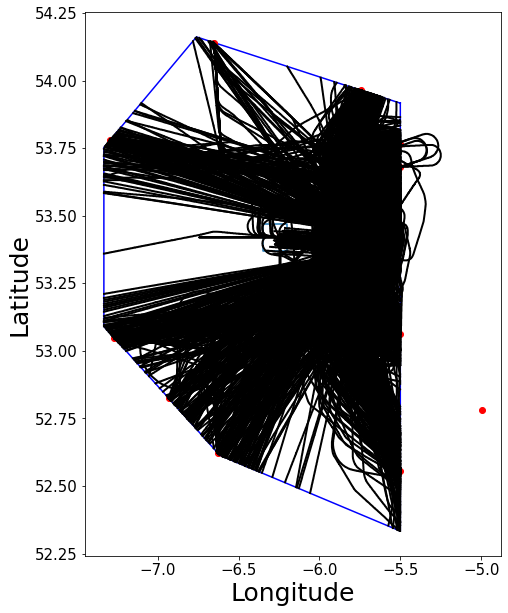

In [7]:
start_time = time.time()
filename = "../data/EIDW/2019/Dataset/dataset.csv"
dataset_df = pd.read_csv(filename, sep=' ',
                         names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_df.set_index(['flight_id', 'sequence'], inplace = True)

plot_horizontal_profile_EIDW(dataset_df, "x", 2)
print("--- %s minutes ---" % ((time.time() - start_time)/60))

In [ ]:
flight_id_num = len(dataset_df.groupby(level='flight_id'))
print(flight_id_num)